# Project Overview: Video Games Sales Prediction Model

## Dataset and Data preprocessing

In [50]:
# loading the dataset
data = pd.read_csv('vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
# Data Preprocessing

## checking for missing values - print(data.isnull().sum())

# removing missing values
data = data.dropna()

# Drop irrelevant columns like 'Rank' and 'Name'
data.drop(columns=['Rank', 'Name'], inplace=True)

# Encode categorical variables using one-hot encoding
data = pd.get_dummies(data)

# Split features and target variable
X = data.drop(columns=['Global_Sales'])
y = data['Global_Sales']

## Base Model Results

High MSE: 0.736

Base model:
- Bias (Train): 2.00066302603858
- Bias (Test): 4.278392896236355
- Variance (Train): 1.928286061425289
- Variance (Test): 2.4975493926254217

Used imrpovement methods:
- Train/Test data
- Hyperparameter tuning
- Neural network model

## Model Imrovement Results

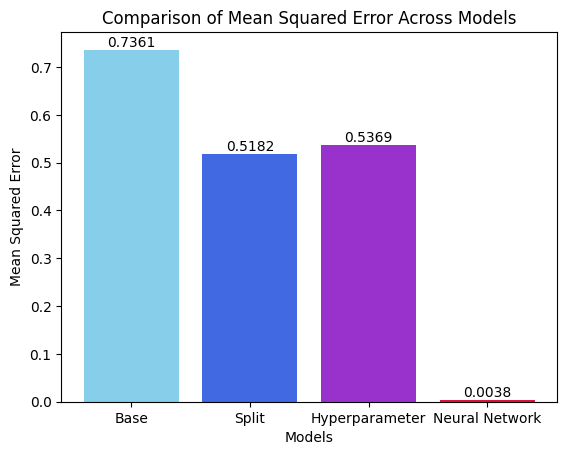

In [70]:
# Define the data and labels
mse_values = [mse_base, mse_split, mse_tune, mse_neural]
labels = ['Base', 'Split', 'Hyperparameter', 'Neural Network']
colors = ['skyblue', 'royalblue', 'darkorchid', 'crimson']

# Plot the bar chart
bars = plt.bar(labels, mse_values, color=colors)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error Across Models')

# Add legend with exact MSE values
for bar, mse in zip(bars, mse_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mse:.4f}', 
             ha='center', va='bottom')

# Show the plot
plt.show()

## References:

Paper Publication: Li, Y. Zheng, H. Hu, J. Lu and C. Zhan, "Predicting Video Game Sales Based on Machine Learning and Hybrid Feature Selection Method," 2021 16th International Conference on Intelligent Systems and Knowledge Engineering (ISKE), Chengdu, China, 2021, pp. 497-502, doi: 10.1109/ISKE54062.2021.9755343. URL: https://ieeexplore.ieee.org/document/9755343

Dataset "Video game sales"  sourced from Kaggle. URL: https://www.kaggle.com/datasets/unclesamoluwasegun/video-game-sales

# Main Part

## Base model

In [18]:
# loading packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from scipy.stats import pearsonr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# loading the dataset
data = pd.read_csv('vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
# checking for missing values
print(data.isnull().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [6]:
# removing missing values
data = data.dropna()

# Drop irrelevant columns like 'Rank' and 'Name'
data.drop(columns=['Rank', 'Name'], inplace=True)

# Encode categorical variables using one-hot encoding
data = pd.get_dummies(data)

# Split features and target variable
X = data.drop(columns=['Global_Sales'])
y = data['Global_Sales']

In [9]:
# Feature selection using Pearson Correlation Coefficient
correlation_coefficients = [pearsonr(X[col], y)[0] for col in X.columns]
correlation_df = pd.DataFrame({'Feature': X.columns, 'Correlation': correlation_coefficients})
selected_features = correlation_df[correlation_df['Correlation'].abs() > 0.1]['Feature'].tolist()

# Further feature selection using Random Forest
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
selected_features_rf = feature_importances[feature_importances > 0.01].index.tolist()

# Combining selected features from both methods
selected_features_combined = list(set(selected_features) | set(selected_features_rf))

# Spliting the data
X_selected = X[selected_features_combined]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [10]:
# Training
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

In [16]:
# Evaluation
y_pred = model.predict(X_test)
mse_base = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_base)
# high MSE value

Mean Squared Error: 0.7361470000080668


## Identifying the problem

In [17]:
# Calculate Bias and Variance
def calculate_bias_variance(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Bias
    bias_train = np.mean((y_train - np.mean(y_train_pred)) ** 2)
    bias_test = np.mean((y_test - np.mean(y_test_pred)) ** 2)

    # Variance
    variance_train = np.mean(np.var(y_train_pred))
    variance_test = np.mean(np.var(y_test_pred))

    return bias_train, bias_test, variance_train, variance_test

# Calculate Bias and Variance of the base model
bias_train_base, bias_test_base, variance_train_base, variance_test_base = calculate_bias_variance(model, X_train, y_train, X_test, y_test)

print("Base Model:")
print("Bias (Train):", bias_train_base)
print("Bias (Test):", bias_test_base)
print("Variance (Train):", variance_train_base)
print("Variance (Test):", variance_test_base)

Base Model:
Bias (Train): 2.00066302603858
Bias (Test): 4.278392896236355
Variance (Train): 1.928286061425289
Variance (Test): 2.4975493926254217


The base model seems to have a relatively low bias on the training set, indicating that it captures the underlying patterns well. However, the higher bias on the testing set and the slightly higher variance on the testing set compared to the training set suggest that the model may benefit from further tuning or regularization to improve its generalization performance.

## Splitting tuning

In [45]:
# another split
X_selected = X[selected_features_combined]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse_split = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_split)
# high MSE value

Mean Squared Error: 0.5181615050427274


As we can see ffrom the new MSE, a simple change in data split from 80/20 to 70/30 has impoved MSE value by aproximately 34%. Further increase in testing set ratio also improved the MSE value with the best value of MSE at 40/60 ratio, while further increases didn't lead to any noticable improvement.

## Tuning Hyperparameter value

In [52]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Tune hyperparameters of the Random Forest model
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)

# Train the Random Forest model with the best hyperparameters
best_rf = RandomForestRegressor(**grid_search.best_params_)
best_rf.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = best_rf.predict(X_test_scaled)
mse_tune = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_tune)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Mean Squared Error: 0.536851407035419


As wee can see tuning hyperparameter value also improves the MSE value, but the final imrovement is still no good enough.

## Neural network model

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Build the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stopping], verbose=0)

# Evaluate the model
mse_neural = model.evaluate(X_test_scaled, y_test)
print("Mean Squared Error (Neural Network):", mse_neural)

153/153 [==============================] - 0s 3ms/step - loss: 0.0038
Mean Squared Error (Neural Network): 0.0037555242888629436


Applying a neural network model to our models solved all problems with low MSE value and now we have improved model enough to states that it predicts video games sales prices with high accuracy.